# 한국노동패널(개인용) 23차 데이터 활용하여 분석하기 2

In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns

In [3]:
# 데이터 불러오기
labor = pd.read_csv('labor_220726.csv')

In [4]:
labor.describe() # 요약 통계량

,hhid,pid,wave,year,p_age,p_econstat,p_edu,p_employ_type,p_firm_size,p_hours,...,p_sample18,p_sample98,p_sex,p_wage,p_weight09_c,p_weight09_l,p_weight18_c,p_weight18_l,p_weight98_c,p_weight98_l
count,22964.000000,2.296400e+04,22964.0,22964.0,22964.000000,22964.000000,22961.000000,12464.000000,8000.000000,12429.000000,...,22964.000000,22964.000000,22964.000000,11750.000000,13577.000000,13577.000000,22713.000000,22713.000000,11830.000000,11830.000000
mean,89712.360913,8.898987e+06,23.0,2020.0,51.935638,1.903893,3.625060,1.332959,2.604250,40.623461,...,1.036231,2.185334,1.528784,277.712681,3350.058261,3350.058262,2002.542200,2002.542201,2842.025671,2842.025673
std,92552.667578,9.304724e+06,0.0,0.0,18.939084,0.989051,1.607489,0.573158,1.749504,12.320543,...,0.238287,0.866050,0.499182,293.174292,2609.028430,3015.872911,1382.658837,1379.933425,4361.072381,6108.622954
min,1.000000,1.010000e+02,23.0,2020.0,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4197.000000,3.020270e+05,23.0,2020.0,38.000000,1.000000,2.000000,1.000000,1.000000,40.000000,...,1.000000,1.000000,1.000000,160.000000,1692.962500,1599.886500,1130.418600,1150.560900,682.876098,65.883747
50%,9607.500000,8.581020e+05,23.0,2020.0,52.000000,1.000000,3.000000,1.000000,2.000000,40.000000,...,1.000000,2.000000,2.000000,240.000000,2707.364500,2706.050800,1736.112800,1745.724700,2042.248400,1941.268800
75%,201644.250000,2.016243e+07,23.0,2020.0,67.000000,3.000000,5.000000,2.000000,4.000000,45.000000,...,1.000000,3.000000,2.000000,350.000000,4244.525400,4297.854500,2448.215800,2419.772500,3382.387775,3210.390650
max,210102.000000,2.101010e+07,23.0,2020.0,104.000000,3.000000,6.000000,3.000000,6.000000,126.000000,...,3.000000,3.000000,2.000000,20000.000000,43607.246000,71219.008000,25715.316000,27858.195000,115841.100000,257781.640000


In [5]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22964 entries, 0 to 22963
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hhid           22964 non-null  int64  
 1   pid            22964 non-null  int64  
 2   wave           22964 non-null  int64  
 3   year           22964 non-null  int64  
 4   p_age          22964 non-null  int64  
 5   p_econstat     22964 non-null  int64  
 6   p_edu          22961 non-null  float64
 7   p_employ_type  12464 non-null  float64
 8   p_firm_size    8000 non-null   float64
 9   p_hours        12429 non-null  float64
 10  p_ind2000      12410 non-null  float64
 11  p_ind2007      12410 non-null  float64
 12  p_ind2017      12410 non-null  float64
 13  p_job_begin    12346 non-null  object 
 14  p_job_status   12436 non-null  float64
 15  p_jobfam2000   12423 non-null  float64
 16  p_jobfam2007   12327 non-null  float64
 17  p_jobfam2017   12324 non-null  float64
 18  p_jobt

In [6]:
# 변수 이름 바꾸기
labor = labor.rename(
    columns = {'p_sex' : 'sex',
               'p_age' : 'age',
               'p_married': 'marriage_type',
               'p_religion': 'religion',
               'p_wage' : 'income',
               'p_jobfam2017': 'code_job',
               'p_region': 'code_region'})

## 1. 연령대에 따른 월급차이 

### 1) 연령대 만들기

In [7]:
labor['age'].head() 

0    79
1    52
2    69
3    66
4    41
Name: age, dtype: int64

In [8]:
# 연령대 변수 만들기
labor = labor.assign(age_class =np.where(labor['age'] < 30, 'young', np.where(labor['age'] <= 59, 'middle', 'old')))

In [9]:
labor['age_class'].value_counts() # 빈도 구하기

middle    11002
old        8628
young      3334
Name: age_class, dtype: int64

<AxesSubplot:xlabel='age_class', ylabel='count'>

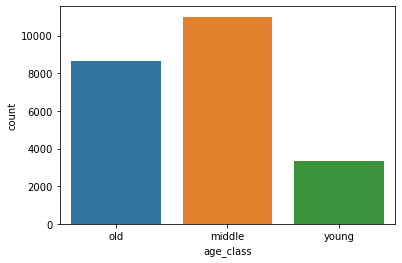

In [10]:
sns.countplot(data = labor, x = 'age_class') # 빈도 막대 그래프

### 2) 연령대에 따른 월급

In [11]:
# 연령대별 월급평균 표
age_class_income = labor.dropna(subset = ['income']).groupby('age_class', as_index = False).agg(mean_income = ('income', 'mean'))

In [12]:
age_class_income

,age_class,mean_income
0,middle,325.541822
1,old,174.258655
2,young,213.872274


<AxesSubplot:xlabel='age_class', ylabel='mean_income'>

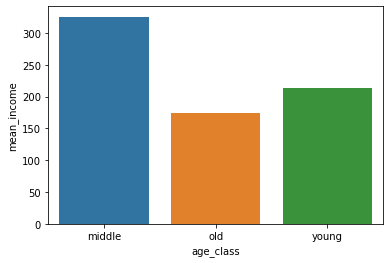

In [13]:
sns.barplot(data = age_class_income, x='age_class', y='mean_income')

<AxesSubplot:xlabel='age_class', ylabel='mean_income'>

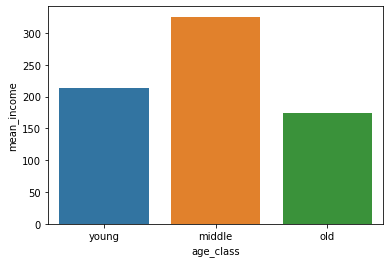

In [20]:
# 막대 정렬
sns.barplot(data = age_class_income, x='age_class', y='mean_income', order = ['young', 'middle', 'old'])

## 2. 연령대 및 성별 월급 차이 

### 1) 연령대별, 성별 월급 

In [14]:
# 성별 항목 이름 부여
labor['sex']=np.where(labor['sex'] ==1, 'male', 'female')

In [15]:
# 연령대 및 성별 월급 평균표

sex_income= labor.dropna(subset=['income']).groupby(['age_class', 'sex'], as_index = False).agg(mean_income = ('income', 'mean'))

In [16]:
sex_income

,age_class,sex,mean_income
0,middle,female,230.053320
1,middle,male,384.851698
2,old,female,117.043975
3,old,male,209.102303
4,young,female,200.184307
5,young,male,231.946988


In [17]:
labor['sex'].head()

0    female
1      male
2      male
3    female
4    female
Name: sex, dtype: object

<AxesSubplot:xlabel='age_class', ylabel='mean_income'>

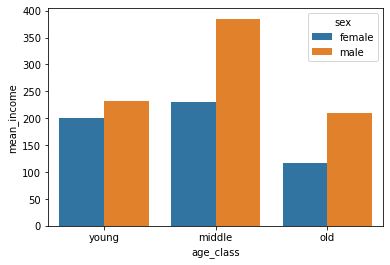

In [18]:
sns.barplot(data=sex_income, x='age_class', y ='mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

### 2) 나이별, 성별 월급

In [19]:
sex_age_income = labor.dropna(subset=['income']).groupby(['age', 'sex'], as_index = False).agg(mean_income = ('income', 'mean'))

In [20]:
sex_age_income.head()

,age,sex,mean_income
0,17,female,55.000000
1,17,male,60.000000
2,18,female,130.000000
3,19,female,117.461538
4,19,male,132.750000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

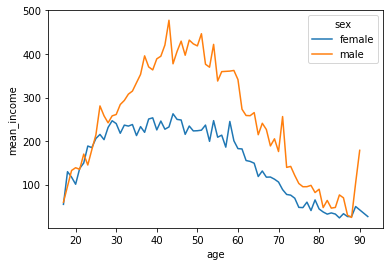

In [21]:
sns.lineplot(data = sex_age_income, x='age', y='mean_income', hue='sex')

## 3. 직업별 월급

### 1) 직업 코드 불러오기

In [23]:
labor['code_job'].dtypes

dtype('float64')

In [24]:
labor['code_job'].value_counts() 

312.0    1010
521.0     836
611.0     822
941.0     533
441.0     438
         ... 
872.0       1
310.0       1
159.0       1
289.0       1
876.0       1
Name: code_job, Length: 151, dtype: int64

In [36]:
list_job = pd.read_excel('code_job.xlsx')

In [37]:
list_job.head()

,코드번호,직업,대분류 코드,대분류 직업명,중분류 코드,중분류 직업명,code_job,job
0,1,관리자,1.0,관리자,11.0,공공 기관 및 기업 고위직,111.0,의회 의원·고위 공무원 및 공공단체 임원
1,11,공공 기관 및 기업 고위직,2.0,전문가 및 관련 종사자,12.0,행정·경영 지원 및 마케팅 관리직,112.0,기업 고위 임원
2,111,의회 의원·고위 공무원 및 공공단체 임원,3.0,사무 종사자,13.0,전문 서비스 관리직,121.0,행정 및 경영 지원 관리자
3,112,기업 고위 임원,4.0,서비스 종사자,14.0,건설·전기 및 생산 관련 관리직,122.0,마케팅 및 광고·홍보 관리자
4,12,행정·경영 지원 및 마케팅 관리직,5.0,판매 종사자,15.0,판매 및 고객 서비스 관리직,131.0,연구·교육 및 법률 관련 관리자


In [38]:
list_job_core = list_job.drop(list_job.columns[[0,1,2, 3,4, 5]], axis=1)

In [39]:
list_job_core.head()

,code_job,job
0,111.0,의회 의원·고위 공무원 및 공공단체 임원
1,112.0,기업 고위 임원
2,121.0,행정 및 경영 지원 관리자
3,122.0,마케팅 및 광고·홍보 관리자
4,131.0,연구·교육 및 법률 관련 관리자


In [40]:
list_job_core.shape 

(268, 2)

### 2) 직업코드와 결합

In [41]:
labor = labor.merge(list_job_core, how='left', on='code_job')

In [47]:
# code_job 결측치 제거하고 출력
labor.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
84,762.0,전기공
85,941.0,청소원 및 환경미화원
86,941.0,청소원 및 환경미화원
171,223.0,데이터 및 네트워크 관련 전문가
256,941.0,청소원 및 환경미화원


### 3) 직업별 월급

In [49]:
job_income = labor.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income=('income', 'mean'))

In [50]:
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,97.611111
1,간호사,277.135338
2,감정·기술 영업 및 중개 관련 종사자,345.456522
3,건물 관리원 및 검표원,177.234177
4,건설 관련 기능 종사자,275.981818


In [51]:
# 상위 10개 추출
top10 = job_income.sort_values('mean_income', ascending=False).head(10)

In [52]:
top10

,job,mean_income
95,의료 진료 전문가,779.166667
21,금융 및 보험 전문가,684.708333
58,보험 및 금융 관리자,668.111111
122,채굴 및 토목 관련 기능 종사자,662.500000
106,재활용 처리 및 소각로 조작원,653.400000
109,전기·전자 부품 및 제품 조립원,630.181818
134,판매 및 운송 관리자,629.166667
16,고객 서비스 관리자,625.000000
55,법률 전문가,620.625000
139,행정 및 경영 지원 관리자,615.833333


In [54]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt

In [56]:
plt.rcParams.update({'font.family': 'Malgun Gothic'})

<AxesSubplot:xlabel='mean_income', ylabel='job'>

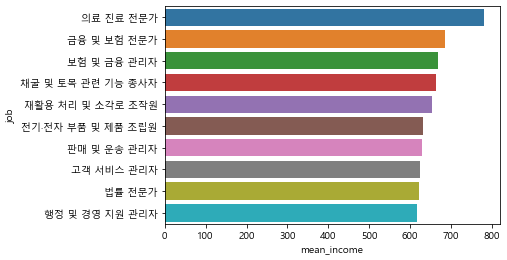

In [58]:
sns.barplot(data= top10, y='job', x='mean_income')

In [59]:
# 하위 10개
bottom10 = job_income.sort_values('mean_income').head(10)

In [60]:
bottom10

,job,mean_income
0,가사 및 육아 도우미,97.611111
35,농림·어업 관련 단순 종사자,105.166667
125,청소원 및 환경미화원,110.865759
96,의복 제조 관련 기능 종사자,116.736842
94,음식 관련 단순 종사자,117.699187
30,기타 돌봄·보건 및 개인 생활 서비스 종사자,125.739583
50,방문 및 노점 판매 관련직,130.568627
39,돌봄 및 보건 서비스 종사자,131.496528
105,작물 재배 종사자,134.265193
100,임업 관련 종사자,157.500000


[(0.0, 800.0)]

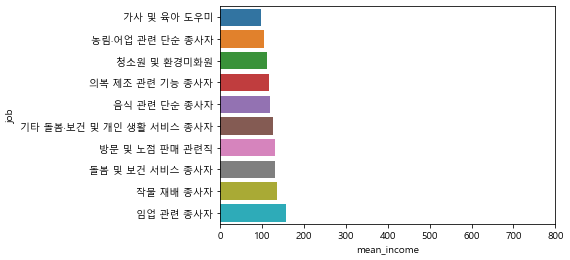

In [61]:
sns.barplot(data = bottom10, y='job', x='mean_income').set(xlim=(0,800))

## 4. 성별 직업 빈도

In [62]:
# 남성 직업 빈도 상위 10개
job_male = labor.dropna(subset=['job']).query('sex =="male"').groupby('job', as_index = False).agg(n=('job', 'count'))\
                .sort_values('n', ascending=False).head(10)

In [63]:
job_male

,job,n
10,경영 관련 사무원,709
5,건설 및 채굴기계 운전원,516
102,작물 재배 종사자,467
40,매장 판매 종사자,387
84,영업 종사자,302
99,자동차 운전원,283
52,배달원,176
122,청소원 및 환경미화원,162
3,건설 관련 기능 종사자,161
8,건축 마감 관련 기능 종사자,159


In [64]:
# 여성 직업 빈도 상위 10개
job_female = labor.dropna(subset=['job']).query('sex== "female"').groupby('job', as_index =False).agg(n=('job', 'count'))\
                  .sort_values('n', ascending=False).head(10)

In [65]:
job_female

,job,n
34,돌봄 및 보건 서비스 종사자,807
36,매장 판매 종사자,449
105,청소원 및 환경미화원,371
90,작물 재배 종사자,355
27,기타 돌봄·보건 및 개인 생활 서비스 종사자,332
100,조리사,324
10,경영 관련 사무원,301
124,회계 및 경리 사무원,221
73,영업 종사자,206
39,문리·기술 및 예능 강사,204


[(0.0, 500.0)]

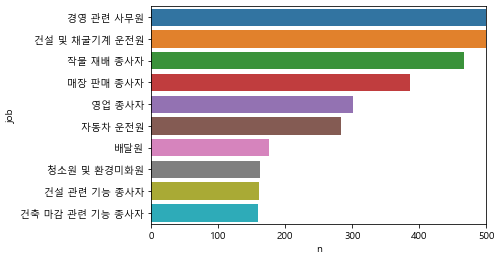

In [66]:
# 남성 직업 빈도 막대그래프
sns.barplot(data = job_male, y='job', x='n').set(xlim=(0,500))

[(0.0, 500.0)]

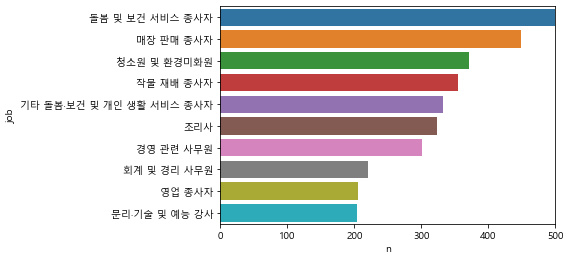

In [68]:
# 여성 직업 빈도 막대그래프
sns.barplot(data = job_female, y='job', x='n').set(xlim=(0,500))